<h2 style="color: darkblue">New York Taxi Fare Prediction Data Analysis & Modelling</h2>

### <p style="color: blue">Name: Murigi Gracious Ng'ang'a</p>

### The end product will be a mock app that helps to predict the amount of fare you are likely to incur when moving from one place to another in New York

In [1]:
# Importing the necessary libraries

# 1. Data Manipulation & numerical calculations
import pandas as pd
import numpy as np
import math

# 2. Data preprocessing and modelling
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# 3. Machine Learning Linear Regression model
from sklearn.linear_model import LinearRegression      

# 4. Evaluation metrics
from sklearn.metrics import mean_squared_error

# 5. Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 6. Saving our model
import joblib

In [2]:
# Load the data - Reading the first 1M rows 
fare_df= pd.read_csv('../Datasets/train.csv', nrows=1_000_000)

# View the first few rows
fare_df.head(3)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2


In [3]:
fare_df.tail(3)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
999997,2013-04-26 14:03:00.000000118,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5
999998,2011-07-08 00:29:00.00000099,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1
999999,2009-12-31 14:30:00.00000021,4.1,2009-12-31 14:30:00 UTC,-74.006635,40.741598,-73.999450,40.745702,1


In [4]:
# View the shape of data
fare_df.shape

(1000000, 8)

In [5]:
# Concise summary of the data
fare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


In [6]:
# Number of null values in each column
fare_df.isna().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [7]:
# Drop the missing values since our dataset is fairly large and very few rows are null
print(f"{len(fare_df) - len(fare_df.dropna())} rows with missing values have been dropped!")
fare_df.dropna(inplace=True)

10 rows with missing values have been dropped!


In [8]:
# Dropping the key column for identification of duplicate rows 
# The 'key' column  has been used as a unique id for each row
fare_df.drop(inplace=True, columns=['key'])
fare_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [9]:
# Dropping all the duplicate rows
print(f"{len(fare_df) - len(fare_df.drop_duplicates())} duplicate rows found and dropped!")
fare_df.drop_duplicates(inplace=True)

0 duplicate rows found and dropped!


In [10]:
# View data types of the columns
fare_df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [11]:
# statistical data for numerical columns
fare_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.347953,-72.526699,39.929040,-72.527860,39.919954,1.684941
std,9.821790,12.057778,7.626087,11.324494,8.201418,1.323907
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


### Data Cleaning Process. The following rows are to be dropped: 
#### 1. Zero-passenger trips
#### 2. Where the fare is 0 or -ve
#### 3. Outliers (Absurd values)
#### 4. Invalid coordinates --> Logitude(180,-180), Logitude(90,-90), 
#### 5. Not within the New York coordinates --> Longitude = (-71.4725,-79.4554), Latitude = (40.2940,45.0042)

In [12]:
fare_df.shape

(999990, 7)

In [13]:
# Dropping rows where the fare is less than or equal to zero
fare_df = fare_df[fare_df['fare_amount'] > 0]
fare_df.shape

(999923, 7)

In [14]:
# Dropping rows with zero-passenger trips
fare_df = fare_df[fare_df['passenger_count'] > 0]
fare_df.shape

(996368, 7)

In [15]:
# Sorting the passenger count column values
sorted_counts = np.sort(fare_df['passenger_count'])
sorted_counts[-10:]

array([  6,   6,   6,   6,   6,   6,   6,   6,   6, 208], dtype=int64)

In [16]:
# Check if there are outliers -- greater than 6
fare_df = fare_df[fare_df['passenger_count'] <= 6]

fare_df.shape

(996367, 7)

In [17]:
# Dropping rows with invalid coordinates (Steps 4 & 5)
fare_df = fare_df[fare_df['pickup_longitude'] <= -71.4725]
fare_df = fare_df[fare_df['pickup_longitude'] >= -79.4554]

fare_df = fare_df[fare_df['pickup_latitude'] <= 45.0042]
fare_df = fare_df[fare_df['pickup_latitude'] >= 40.2940]

fare_df = fare_df[fare_df['dropoff_longitude'] <= -71.4725]
fare_df = fare_df[fare_df['dropoff_longitude'] >= -79.4554]

fare_df = fare_df[fare_df['dropoff_latitude'] <= 45.0042]
fare_df = fare_df[fare_df['dropoff_latitude'] >= 40.2940]

fare_df.shape

(975710, 7)

In [18]:
# Statistical data
fare_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,975710.000000,975710.000000,975710.000000,975710.000000,975710.000000,975710.000000
mean,11.342525,-73.975205,40.751102,-73.974291,40.751445,1.691051
std,9.756582,0.041462,0.030181,0.040029,0.033605,1.306176
min,0.010000,-78.669423,40.300233,-78.669423,40.300223,1.000000
25%,6.000000,-73.992272,40.736573,-73.991573,40.735582,1.000000
50%,8.500000,-73.982083,40.753410,-73.980591,40.753872,1.000000
75%,12.500000,-73.968312,40.767581,-73.965316,40.768419,2.000000
max,500.000000,-72.702870,43.213962,-72.196091,44.600000,6.000000


In [19]:
# changing 'pickup_datetime' to datetime data type
fare_df['pickup_datetime'] = pd.to_datetime(fare_df['pickup_datetime'], format = '%Y-%m-%d %H:%M:%S %Z')
fare_df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [20]:
# Creating new columns from the datetime object
fare_df['year'] = fare_df['pickup_datetime'].dt.strftime('%Y')
fare_df['month'] = fare_df['pickup_datetime'].dt.strftime('%m')
fare_df['day'] = fare_df['pickup_datetime'].dt.strftime('%d')
fare_df['hour'] = fare_df['pickup_datetime'].dt.strftime('%H')
fare_df['minute'] = fare_df['pickup_datetime'].dt.strftime('%M')
fare_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,06,15,17,26
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,01,05,16,52
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,08,18,00,35
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,04,21,04,30
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,03,09,07,51
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,7.0,2014-09-13 21:44:38+00:00,-73.976676,40.785630,-73.959196,40.775114,1,2014,09,13,21,44
999996,7.3,2010-09-20 14:50:37+00:00,-73.992103,40.671385,-73.992103,40.671385,2,2010,09,20,14,50
999997,10.5,2013-04-26 14:03:00+00:00,-73.978423,40.751135,-73.993397,40.762197,5,2013,04,26,14,03
999998,6.9,2011-07-08 00:29:00+00:00,-73.980317,40.759482,-73.976832,40.743122,1,2011,07,08,00,29


In [21]:
# Dropping the pickup_datetime column
fare_df.drop(columns=['pickup_datetime'], inplace=True)
fare_df.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,06,15,17,26
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,01,05,16,52
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,08,18,00,35


In [22]:
# Making the 'time' columns numeric
fare_df[['year', 'month','day', 'hour', 'minute']] = fare_df[['year', 'month','day', 'hour', 'minute']].apply(pd.to_numeric)
fare_df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
month                  int64
day                    int64
hour                   int64
minute                 int64
dtype: object

### The formula used to calculate the distance between longitudes and latitudes:

### <a href="https://www.sisense.com/blog/latitude-longitude-distance-calculation-explained/" style="color: purple; font-weight: bolder; font-family:'Gill Sans MT'; font-size: 24px "> Haversine Formula </a>

$a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)$

$c = 2 * atan2( √a, √(1−a) )$

$d = R * c $

### Where φ represents the latitudes, λ the longitudes and R the radius of the earth

In [23]:
# Function to calculate the distance in kilometers between the latitudes and longitudes

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculates the distance between two locations given the latitudes and longitudes

    lat1: The start latitude
    lat2: The end latitude
    lon1: The start longitude
    lon2: The end longitude
    """
    earth_radius = 6371
    
    #Convert the angles from degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    lat_diff = lat2 - lat1
    lon_diff = lon2 - lon1
    
    a = pow(math.sin(lat_diff/2), 2) + math.cos(lat1) * math.cos(lat1) * pow(math.sin(lon_diff/2), 2)
    # c = 2 * math.asin(math.sqrt(a))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = earth_radius * c
    
    return distance

In [24]:
# Adding the distance column to our dataframe
distances = []

for i in range(fare_df.shape[0]):                       # or range(len(fare_df))
    pick_lon = fare_df.iloc[i]['pickup_longitude']
    pick_lat = fare_df.iloc[i]['pickup_latitude']
    drop_lon = fare_df.iloc[i]['dropoff_longitude']
    drop_lat = fare_df.iloc[i]['dropoff_latitude']
    distance = haversine(pick_lon, pick_lat, drop_lon, drop_lat)
    distances.append(distance)
    
fare_df['distance in kilometres'] = distances
fare_df.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,distance in kilometres
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,1.030761
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,8.450738
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,1.389495


In [25]:
# Adding the longitude_difference and latitude_difference columns to our data frame
fare_df['longitude_difference'] = (fare_df['dropoff_longitude'] - fare_df['pickup_longitude']).abs()
fare_df['latitude_difference'] = (fare_df['dropoff_latitude'] - fare_df['pickup_latitude']).abs()

In [26]:
fare_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,distance in kilometres,longitude_difference,latitude_difference
count,975710.000000,975710.000000,975710.000000,975710.000000,975710.000000,975710.000000,975710.000000,975710.000000,975710.000000,975710.000000,975710.000000,975710.000000,975710.000000,975710.000000
mean,11.342525,-73.975205,40.751102,-73.974291,40.751445,1.691051,2011.739808,6.270813,15.692340,13.509214,29.566361,3.339003,0.022896,0.021340
std,9.756582,0.041462,0.030181,0.040029,0.033605,1.306176,1.866219,3.437408,8.682335,6.511878,17.322748,3.952935,0.037186,0.024815
min,0.010000,-78.669423,40.300233,-78.669423,40.300223,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992272,40.736573,-73.991573,40.735582,1.000000,2010.000000,3.000000,8.000000,9.000000,15.000000,1.254095,0.006128,0.006932
50%,8.500000,-73.982083,40.753410,-73.980591,40.753872,1.000000,2012.000000,6.000000,16.000000,14.000000,30.000000,2.153389,0.012701,0.014161
75%,12.500000,-73.968312,40.767581,-73.965316,40.768419,2.000000,2013.000000,9.000000,23.000000,19.000000,45.000000,3.919560,0.023929,0.027187
max,500.000000,-72.702870,43.213962,-72.196091,44.600000,6.000000,2015.000000,12.000000,31.000000,23.000000,59.000000,424.833128,4.078017,3.820613


In [27]:
# Drop rows where the distance is zero
fare_df = fare_df[fare_df['distance in kilometres'] > 0]
fare_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,distance in kilometres,longitude_difference,latitude_difference
count,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000
mean,11.345486,-73.975520,40.750993,-73.974596,40.751340,1.691269,2011.744716,6.271082,15.690943,13.509853,29.565240,3.375288,0.023145,0.021571
std,9.678684,0.038662,0.028379,0.037112,0.032034,1.306256,1.867451,3.437705,8.682693,6.512643,17.324087,3.958917,0.037310,0.024849
min,0.010000,-78.650908,40.300233,-78.659447,40.300223,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000084,0.000000,0.000000
25%,6.000000,-73.992284,40.736591,-73.991579,40.735597,1.000000,2010.000000,3.000000,8.000000,9.000000,15.000000,1.278850,0.006321,0.007138
50%,8.500000,-73.982107,40.753424,-73.980624,40.753890,1.000000,2012.000000,6.000000,16.000000,14.000000,30.000000,2.177929,0.012865,0.014355
75%,12.500000,-73.968457,40.767583,-73.965480,40.768424,2.000000,2013.000000,9.000000,23.000000,19.000000,45.000000,3.951572,0.024121,0.027408
max,495.000000,-72.702870,43.183332,-72.196091,44.600000,6.000000,2015.000000,12.000000,31.000000,23.000000,59.000000,424.833128,4.078017,3.820613


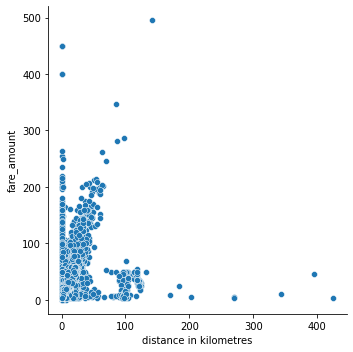

In [28]:
#Plotting distances in kilometers vs fare amount
sns.relplot(data = fare_df, x = 'distance in kilometres', y = 'fare_amount')

## Feature Exploration with aggregation

In [29]:
def plot_group(x_unique, group_means, x_label, title, palette):
    """
    Plots bar plots of fare_amount against the various forms of grouped data
    x_unique: Unique values for the x-axis
    group_means: A list of the means for each unique group
    palette: The color palette to be used on the plot
    """
    plt.figure(figsize=(10,5))
    sns.barplot(x = x_unique, y = group_means['fare_amount'], palette=palette)
    plt.xlabel(x_label)
    plt.title(title, pad=25)

### Passengers

In [30]:
# Grouping the data by passengers
passenger_group_means = fare_df.groupby(['passenger_count']).mean()
passenger_group_means

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,month,day,hour,minute,distance in kilometres,longitude_difference,latitude_difference
passenger_count,,,,,,,,,,,,,
1,11.207628,-73.975515,40.751302,-73.974558,40.751529,2011.769719,6.255625,15.664426,13.363532,29.576921,3.329833,0.022787,0.021314
2,11.808544,-73.975420,40.749979,-73.974457,40.750714,2011.638544,6.301339,15.715315,14.007688,29.508716,3.547814,0.024593,0.022485
3,11.507638,-73.976502,40.749825,-73.975723,40.750671,2011.681696,6.361224,15.807179,13.803502,29.525667,3.414143,0.023201,0.021963
4,11.711905,-73.976867,40.749248,-73.976559,40.750427,2011.664630,6.413463,15.873984,13.967618,29.549343,3.459488,0.023485,0.022283
5,11.223965,-73.975040,40.751344,-73.974075,40.751545,2011.418515,6.245340,15.777953,13.575585,29.556595,3.373767,0.023152,0.021550
6,12.289971,-73.974620,40.751043,-73.974267,40.751187,2012.966683,6.318018,15.669645,13.502137,29.706799,3.487246,0.024181,0.022096


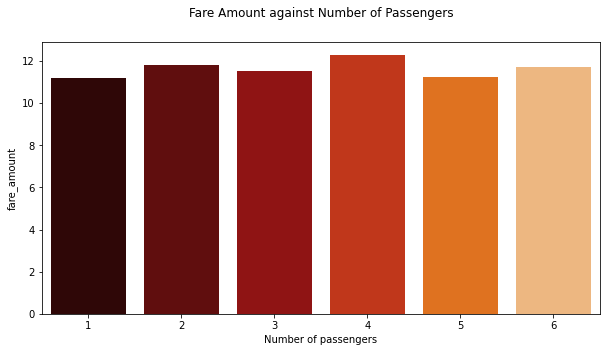

In [31]:
# Plotting the grouped data
plot_group(x_unique=fare_df['passenger_count'].unique(), 
                 group_means=passenger_group_means, 
                 x_label='Number of passengers',
                 title='Fare Amount against Number of Passengers',
                 palette='gist_heat')

### Year

In [32]:
# Grouping the data by years
year_group_means = fare_df.groupby(['year']).mean()
year_group_means

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,day,hour,minute,distance in kilometres,longitude_difference,latitude_difference
year,,,,,,,,,,,,,
2009,10.027271,-73.975592,40.751915,-73.974579,40.751853,1.693268,6.550532,15.750390,13.513872,29.601591,3.260391,0.022082,0.021053
2010,10.163705,-73.975931,40.751331,-73.974887,40.751463,1.674760,6.525035,15.951878,13.500604,29.494640,3.295496,0.022304,0.021295
2011,10.441670,-73.976500,40.750992,-73.975348,40.751384,1.673612,6.504758,15.631009,13.482826,29.544375,3.386490,0.023108,0.021592
2012,11.192015,-73.975620,40.750728,-73.974673,40.751158,1.695759,6.443698,15.621359,13.476297,29.687752,3.405826,0.023229,0.021848
2013,12.599509,-73.975123,40.750481,-73.974528,40.750978,1.712136,6.443966,15.694948,13.516397,29.594478,3.430122,0.023680,0.021846
2014,12.905375,-73.975051,40.750554,-73.974014,40.751018,1.700923,6.416731,15.568999,13.554915,29.504782,3.448929,0.024050,0.021814
2015,13.012596,-73.973978,40.750909,-73.973571,40.751748,1.684084,3.511497,15.542266,13.545979,29.468944,3.426515,0.024064,0.021507


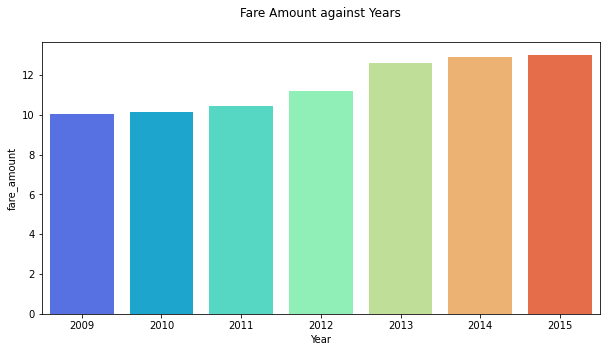

In [33]:
# Plotting the grouped data
plot_group(x_unique=fare_df['year'].unique(), 
                 group_means=year_group_means, 
                 x_label='Year',
                 title='Fare Amount against Years',
                 palette='rainbow')

### Month

In [34]:
# Grouping the data by months
month_group_means = fare_df.groupby(['month']).mean()
month_group_means

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,hour,minute,distance in kilometres,longitude_difference,latitude_difference
month,,,,,,,,,,,,,
1,10.741288,-73.975548,40.751500,-73.974876,40.751739,1.693090,2011.951950,16.462358,13.564456,29.683954,3.211336,0.021864,0.020656
2,10.894426,-73.976548,40.751115,-73.975150,40.751697,1.673067,2012.010464,14.870102,13.592783,29.551121,3.251571,0.022037,0.020889
3,11.138471,-73.976103,40.751170,-73.974754,40.751427,1.679368,2012.025182,16.113128,13.554016,29.589468,3.323380,0.022646,0.021286
4,11.297897,-73.975677,40.751225,-73.974681,40.751610,1.691023,2011.972320,15.601121,13.564124,29.516822,3.375500,0.023046,0.021590
5,11.629131,-73.975037,40.751100,-73.973883,40.751493,1.688226,2011.942014,15.559912,13.482079,29.541453,3.465483,0.023961,0.022008
6,11.546246,-73.975118,40.750952,-73.974453,40.751377,1.693801,2011.927151,15.432261,13.412038,29.637653,3.435399,0.023670,0.021896
7,11.126462,-73.975575,40.750283,-73.974881,40.750607,1.701020,2011.482987,16.373358,13.509398,29.523732,3.412777,0.023404,0.021864
8,11.234443,-73.975448,40.750055,-73.974710,40.750404,1.699045,2011.478135,15.926934,13.442038,29.617376,3.459083,0.023783,0.022094
9,11.745191,-73.975491,40.750459,-73.974501,40.750742,1.693418,2011.478267,15.722685,13.435414,29.485856,3.431298,0.023643,0.021813


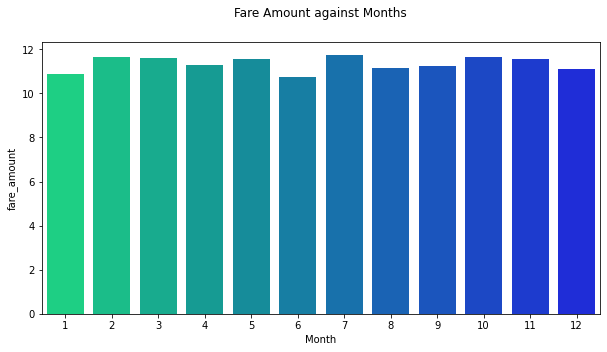

In [35]:
# Plotting the grouped data
plot_group(x_unique=fare_df['month'].unique(), 
                 group_means=month_group_means, 
                 x_label='Month',
                 title='Fare Amount against Months',
                 palette='winter_r')

### Hour

In [36]:
# Grouping the data by hours
hour_group_means = fare_df.groupby(['hour']).mean()
hour_group_means

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,minute,distance in kilometres,longitude_difference,latitude_difference
hour,,,,,,,,,,,,,
0,11.717357,-73.978900,40.743901,-73.973508,40.746093,1.753449,2011.734004,6.332633,15.793783,27.923851,3.831788,0.024364,0.025574
1,11.424954,-73.981521,40.742525,-73.971938,40.745235,1.750543,2011.731628,6.365013,15.689274,28.034624,3.780427,0.023824,0.025280
2,11.450369,-73.983197,40.741704,-73.970609,40.745591,1.744359,2011.715633,6.369833,15.744407,28.099450,3.882433,0.024083,0.026230
3,12.013269,-73.984192,40.741631,-73.968255,40.746004,1.753636,2011.711288,6.311945,15.805509,27.910735,4.082946,0.025924,0.027207
4,13.521498,-73.980923,40.744385,-73.959845,40.745817,1.712932,2011.724446,6.331001,15.625244,26.203543,4.693511,0.033569,0.028629
5,15.421365,-73.969920,40.747179,-73.955097,40.747231,1.614405,2011.829214,6.318553,15.807150,31.963827,5.340887,0.042723,0.029722
6,12.208275,-73.971297,40.750995,-73.967032,40.751106,1.531023,2011.822573,6.258008,15.608733,34.135073,4.154224,0.031431,0.024755
7,10.983889,-73.972621,40.753822,-73.972943,40.753886,1.558178,2011.753900,6.284322,15.496932,31.752150,3.466717,0.024830,0.021671
8,10.922314,-73.974504,40.754128,-73.976370,40.752855,1.592280,2011.722305,6.219215,15.598071,30.249310,3.070293,0.021440,0.019544


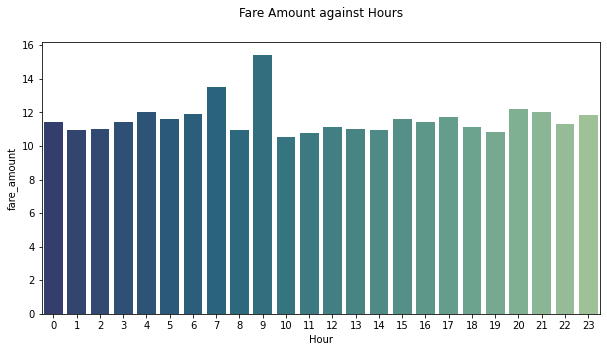

In [37]:
# Plotting the grouped data
plot_group(x_unique=fare_df['hour'].unique(), 
                 group_means=hour_group_means, 
                 x_label='Hour',
                 title='Fare Amount against Hours',
                 palette='crest_r')

### **According to the 4 immediate graphs above, we can deduce that in the year period of 2009 - 2015:**
#### 1. An average of 10-15 dollars were spent per hour on Taxi Fare in New York
#### 2. An average of 10-12 dollars were spent per month
#### 3. Fare has been on the increase over the years (owing to population growth and industrialization) and we could say that this could continue in the years after 2015.
#### 4. For every trip, an average of 11-12 dollars was spent on Taxi Fare


## Feature exploration with the correlation matrix

Text(0.5, 1.0, "Variables correlations' matrix")

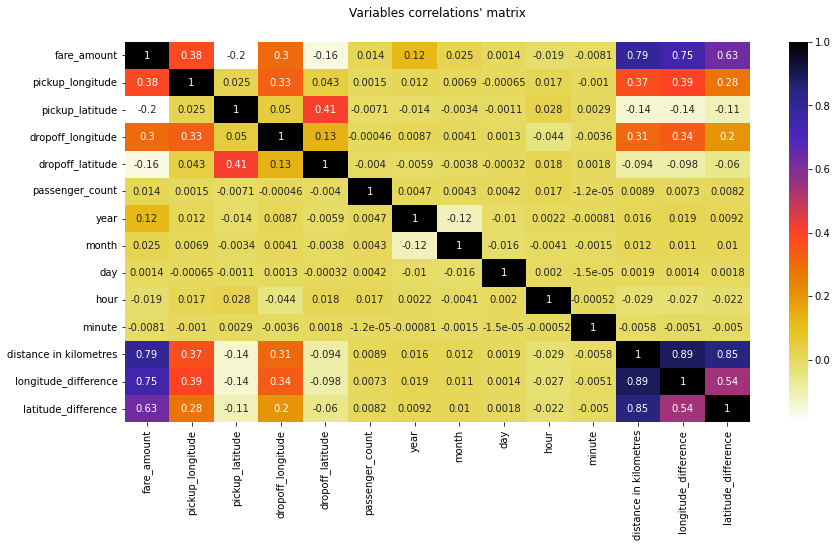

In [38]:
corr_matrix = fare_df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, cmap=plt.cm.CMRmap_r, annot=True)
plt.title("Variables correlations' matrix", pad=25)

In [39]:
# Correlations of features with the target variable
corr_target = abs(corr_matrix['fare_amount'])
corr_target

fare_amount               1.000000
pickup_longitude          0.380424
pickup_latitude           0.197608
dropoff_longitude         0.299773
dropoff_latitude          0.157974
passenger_count           0.013706
year                      0.117924
month                     0.025349
day                       0.001423
hour                      0.019097
minute                    0.008093
distance in kilometres    0.794570
longitude_difference      0.746860
latitude_difference       0.631502
Name: fare_amount, dtype: float64


The __distance in kilometers__ feature has the highest correlation with the **'day'** feature having the lowest correlation with the target variable **'fare_amount'**


In [40]:
fare_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965221 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   fare_amount             965221 non-null  float64
 1   pickup_longitude        965221 non-null  float64
 2   pickup_latitude         965221 non-null  float64
 3   dropoff_longitude       965221 non-null  float64
 4   dropoff_latitude        965221 non-null  float64
 5   passenger_count         965221 non-null  int64  
 6   year                    965221 non-null  int64  
 7   month                   965221 non-null  int64  
 8   day                     965221 non-null  int64  
 9   hour                    965221 non-null  int64  
 10  minute                  965221 non-null  int64  
 11  distance in kilometres  965221 non-null  float64
 12  longitude_difference    965221 non-null  float64
 13  latitude_difference     965221 non-null  float64
dtypes: float64(8), int64

## Feature Selection

#### Out of the 13 features, we could select the most relevant features using the correlation values

In [41]:
relevant_features = corr_target[corr_target > 0.5]
relevant_features

fare_amount               1.000000
distance in kilometres    0.794570
longitude_difference      0.746860
latitude_difference       0.631502
Name: fare_amount, dtype: float64

### The **distance in kilometers**, **longitude_difference** and **latitude_difference** are our most relevant features

In [42]:
# Create a new DataFrame with only the relevant features
data_with_relevant = fare_df[['fare_amount', 'distance in kilometres', 'longitude_difference', 'latitude_difference']]
data_with_relevant

,fare_amount,distance in kilometres,longitude_difference,latitude_difference
0,4.5,1.030761,0.002701,0.009041
1,16.9,8.450738,0.036780,0.070701
2,5.7,1.389495,0.008504,0.010708
3,7.7,2.799280,0.004437,0.024949
4,5.3,1.999212,0.011440,0.015754
...,...,...,...,...
999994,20.0,6.433821,0.076395,0.000935
999995,7.0,1.879672,0.017480,0.010516
999997,10.5,1.761816,0.014974,0.011062
999998,6.9,1.842677,0.003485,0.016360


## Separating the features from the output (target) variable

In [43]:
X1 = data_with_relevant.drop(columns=['fare_amount'])
y1 = data_with_relevant['fare_amount']
X1, y1

(        distance in kilometres  longitude_difference  latitude_difference
 0                     1.030761              0.002701             0.009041
 1                     8.450738              0.036780             0.070701
 2                     1.389495              0.008504             0.010708
 3                     2.799280              0.004437             0.024949
 4                     1.999212              0.011440             0.015754
 ...                        ...                   ...                  ...
 999994                6.433821              0.076395             0.000935
 999995                1.879672              0.017480             0.010516
 999997                1.761816              0.014974             0.011062
 999998                1.842677              0.003485             0.016360
 999999                0.758066              0.007185             0.004104
 
 [965221 rows x 3 columns],
 0          4.5
 1         16.9
 2          5.7
 3          7.7
 4    

## Machine Learning model

In [44]:
model1 = LinearRegression() 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
model1.fit(X1_train, y1_train)
kfold1 = KFold(n_splits=10, random_state=42, shuffle=True)
cv_results1 = -(cross_val_score(model1, X1_test, y1_test, cv=kfold1, scoring='neg_mean_squared_error'))
print(f"Linear Regression Error : {np.mean(cv_results1)}")

Linear Regression Error : 36.736948145095155


#### Splitting data into **X2** and **y2**, where features had not been dropped to create model2

In [45]:
X2 = fare_df.drop(columns=['fare_amount'])
y2 = fare_df['fare_amount']
X2, y2

(        pickup_longitude  pickup_latitude  dropoff_longitude  \
 0             -73.844311        40.721319         -73.841610   
 1             -74.016048        40.711303         -73.979268   
 2             -73.982738        40.761270         -73.991242   
 3             -73.987130        40.733143         -73.991567   
 4             -73.968095        40.768008         -73.956655   
 ...                  ...              ...                ...   
 999994        -73.872919        40.774106         -73.796524   
 999995        -73.976676        40.785630         -73.959196   
 999997        -73.978423        40.751135         -73.993397   
 999998        -73.980317        40.759482         -73.976832   
 999999        -74.006635        40.741598         -73.999450   
 
         dropoff_latitude  passenger_count  year  month  day  hour  minute  \
 0              40.712278                1  2009      6   15    17      26   
 1              40.782004                1  2010      1    5  

### Training another model (model2) based on the dataset where features had not been dropped

In [46]:
model2 = LinearRegression() 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
model2.fit(X2_train, y2_train)
kfold2 = KFold(n_splits=10, random_state=42, shuffle=True)
cv_results2 = -(cross_val_score(model2, X2_test, y2_test, cv=kfold2, scoring='neg_mean_squared_error'))
print(f"Linear Regression Error : {np.mean(cv_results2)}")

Linear Regression Error : 32.98854262303762


### From the results, we can see that model2 has better performance. probably due to <a href="https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b#14d9" style="color: purple">**the assumption in Linear algebra**</a> that : independent variables need to be uncorrelated with one another.

In [47]:
# Correlation between the chosen relevant features
print(fare_df[["distance in kilometres","latitude_difference"]].corr())
print(fare_df[["longitude_difference","distance in kilometres"]].corr())
print(fare_df[["longitude_difference","latitude_difference"]].corr())

                        distance in kilometres  latitude_difference
distance in kilometres                1.000000             0.848074
latitude_difference                   0.848074             1.000000
                        longitude_difference  distance in kilometres
longitude_difference                1.000000                0.890916
distance in kilometres              0.890916                1.000000
                      longitude_difference  latitude_difference
longitude_difference              1.000000             0.539039
latitude_difference               0.539039             1.000000


#### The relevant features had a high correlation with one another

#### We can also say that some of dropped features had some relevance to some extent

#### In this case, I would opt to use **model2** (the model trained on all features) for deployment

### Saving the model

In [48]:
joblib.dump(model2, 'ny_taxifare_predictor.joblib')

['ny_taxifare_predictor.joblib']

In [49]:
fare_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,distance in kilometres,longitude_difference,latitude_difference
count,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000,965221.000000
mean,11.345486,-73.975520,40.750993,-73.974596,40.751340,1.691269,2011.744716,6.271082,15.690943,13.509853,29.565240,3.375288,0.023145,0.021571
std,9.678684,0.038662,0.028379,0.037112,0.032034,1.306256,1.867451,3.437705,8.682693,6.512643,17.324087,3.958917,0.037310,0.024849
min,0.010000,-78.650908,40.300233,-78.659447,40.300223,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000084,0.000000,0.000000
25%,6.000000,-73.992284,40.736591,-73.991579,40.735597,1.000000,2010.000000,3.000000,8.000000,9.000000,15.000000,1.278850,0.006321,0.007138
50%,8.500000,-73.982107,40.753424,-73.980624,40.753890,1.000000,2012.000000,6.000000,16.000000,14.000000,30.000000,2.177929,0.012865,0.014355
75%,12.500000,-73.968457,40.767583,-73.965480,40.768424,2.000000,2013.000000,9.000000,23.000000,19.000000,45.000000,3.951572,0.024121,0.027408
max,495.000000,-72.702870,43.183332,-72.196091,44.600000,6.000000,2015.000000,12.000000,31.000000,23.000000,59.000000,424.833128,4.078017,3.820613
